In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

np.random.seed(1)

In [ ]:
# Total number of feature vectors
N = 100

In [ ]:
# Create one-dimensional feature vectors that range from 0 to 5
X = 5*np.random.rand(N,1)

In [ ]:
# True weight and bias
w, b = 2, 1

In [ ]:
# Add randomness to the labels
y = w*X + b + np.random.randn(N,1)

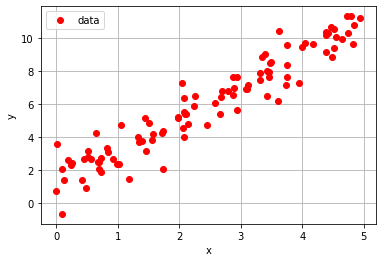

In [ ]:
plt.plot(X,y,'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data'])
# plt.savefig('dataLinearRegression.png')
# files.download('dataLinearRegression.png')

Text(0, 0.5, 'y')

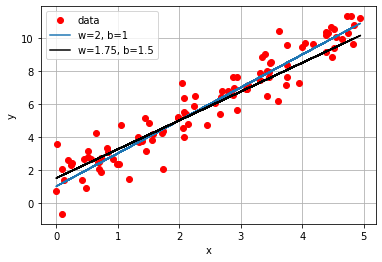

In [ ]:
plt.plot(X,y, 'ro')
plt.plot(X, w*X+b)
plt.plot(X, (w-0.25)*X+(b+0.5),'k')
plt.legend(['data','w=2, b=1','w=1.75, b=1.5'])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('LinearRegression.png')
# files.download('LinearRegression.png')

In [ ]:
# Add a constant feature 1 to account for the bias term 
X_b = np.c_[X, np.ones((N, 1))]

In [ ]:
print(X_b.shape)

(100, 2)


In [ ]:
# Linear regression using gradient descent
eta = 0.01
iterations = 1000

theta = np.random.randn(2,1)

for i in range(iterations):
  gradients = 2/N*(X_b.T @ (X_b @ theta- y))
  theta -= eta* gradients

In [ ]:
print("Weight and bias from gradient descent linear regression: {}, {}".format(theta[0][0], theta[1][0]))

Weight and bias from gradient descent linear regression: 1.938787827283204, 1.231151817478208


In [ ]:
# Linear regression using scikit-learn LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print("Weight and bias from sklearn LinearRegression: {}, {}".format(lin_reg.coef_[0][0], lin_reg.intercept_[0]))

Weight and bias from sklearn LinearRegression: 1.9369850175310641, 1.2369572541489076


In [ ]:
# Mini-batch gradient descent linear regression
eta_0, eta_1 = 0.1, 0.01 # Learning rate hyperparameters
def learning_scheduler(t):
  return eta_0*(1-t) + t*eta_1

theta = np.random.randn(2,1)

epochs = 50
batch_size = 10
batches_per_epoch = np.int(N/batch_size)

for epoch in range(epochs):
  for i in range(batches_per_epoch):
    ind = np.random.choice(N, size=batch_size, replace=False)
    xt = X_b[ind]
    yt = y[ind]
    grad_loss = 2/batch_size * xt.T @ (xt @ theta-yt)
    eta = learning_scheduler( (epoch * batches_per_epoch + i)/ (epochs * batches_per_epoch))
    theta -= eta*grad_loss

In [ ]:
print("Weight and bias from batch-gradient descent linear regression: {}, {}".format(theta[0][0], theta[1][0]))

Weight and bias from batch-gradient descent linear regression: 1.9311244051343082, 1.260133591076117
